In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import operator
import seaborn as sns

In [3]:
import_file = 'business.json'
business = pd.read_json(import_file,lines=True)

In [12]:
business.head(2)
type(business)

pandas.core.frame.DataFrame

In [16]:
result = business.sort_values(by ='review_count', ascending=False)
business_top10review = result[:10]
business_top10review

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
103325,3655 Las Vegas Blvd S,"{u'Alcohol': u'full_bar', u'HasTV': False, u'N...",4JNXUYY8wbaaDmk3BPzlWw,"[French, Steakhouses, Breakfast & Brunch, Rest...",Las Vegas,"{u'Monday': u'7:00-23:00', u'Tuesday': u'7:00-...",1,36.112827,-115.172581,Mon Ami Gabi,The Strip,89109,6979,4.0,NV
125404,3570 S Las Vegas Blvd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",RESDUcs7fIiihp38-d6_6g,"[Food, Restaurants, Buffets, Breakfast & Brunc...",Las Vegas,"{u'Monday': u'7:30-22:00', u'Tuesday': u'7:30-...",1,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109,6417,4.0,NV
45588,3708 Las Vegas Blvd S,"{u'GoodForMeal': {u'dessert': False, u'latenig...",K7lWdNUhCbcnEvI0NhGewg,"[Buffets, Breakfast & Brunch, Restaurants]",Las Vegas,"{u'Monday': u'8:00-21:00', u'Tuesday': u'8:00-...",1,36.109447,-115.176271,Wicked Spoon,The Strip,89109,5632,3.5,NV
114018,3667 Las Vegas Blvd S,"{u'GoodForMeal': {u'dessert': False, u'latenig...",cYwJA2A6I12KNkm2rtXd5g,"[American (Traditional), Restaurants, Burgers]",Las Vegas,"{u'Monday': u'11:00-0:00', u'Tuesday': u'11:00...",0,36.110724,-115.172169,Gordon Ramsay BurGR,The Strip,89109,5429,4.0,NV
100916,3667 Las Vegas Blvd S,"{u'Alcohol': u'beer_and_wine', u'HasTV': True,...",DkYS3arLOhA8si5uUEmHOw,"[Food Delivery Services, Restaurants, Caterers...",Las Vegas,"{u'Monday': u'0:00-0:00', u'Tuesday': u'0:00-0...",1,36.109362,-115.171874,Earl of Sandwich,The Strip,89109,4789,4.5,NV
104769,3535 Las Vegas Blvd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",f4x1YBxkLrZg652xt2KR5g,"[American (New), Restaurants, Breakfast & Brunch]",Las Vegas,"{u'Monday': u'0:00-0:00', u'Tuesday': u'0:00-0...",1,36.118181,-115.171580,Hash House A Go Go,The Strip,89109,4371,4.0,NV
106981,"Caesars Palace Las Vegas Hotel And Casino, 357...","{u'Alcohol': u'full_bar', u'HasTV': True, u'No...",eoHdUeQDNgQ6WYEnP2aiRw,"[Social Clubs, Restaurants, Desserts, Food, Am...",Las Vegas,"{u'Monday': u'9:00-22:00', u'Tuesday': u'9:00-...",0,36.115670,-115.173317,Serendipity 3,The Strip,89109,3913,3.0,NV
19669,3131 Las Vegas Blvd S,"{u'Alcohol': u'full_bar', u'HasTV': False, u'N...",2weQS-RnoOBhb1KsHKyoSQ,"[Buffets, Restaurants]",Las Vegas,"{u'Monday': u'8:00-22:00', u'Tuesday': u'8:00-...",1,36.126887,-115.165590,The Buffet,The Strip,89109,3873,3.5,NV
92918,"953 E Sahara Ave, Ste A5","{u'Alcohol': u'beer_and_wine', u'HasTV': False...",KskYqH1Bi7Z_61pH6Om8pg,"[Automotive, Car Dealers, Restaurants, Thai, N...",Las Vegas,"{u'Monday': u'11:00-14:30', u'Tuesday': u'11:0...",1,36.143450,-115.142780,Lotus of Siam,Eastside,89104,3838,4.0,NV
68904,3600 S Las Vegas Blvd,"{u'Alcohol': u'full_bar', u'HasTV': False, u'N...",ujHiaprwCQ5ewziu0Vi9rw,"[American (New), Buffets, Restaurants]",Las Vegas,"{u'Monday': u'7:00-22:00', u'Tuesday': u'7:00-...",1,36.113220,-115.176890,The Buffet at Bellagio,The Strip,89109,3700,3.5,NV


In [20]:
# select rows by value
busi1 = business.loc[business['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw']
busi1

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
103325,3655 Las Vegas Blvd S,"{u'Alcohol': u'full_bar', u'HasTV': False, u'N...",4JNXUYY8wbaaDmk3BPzlWw,"[French, Steakhouses, Breakfast & Brunch, Rest...",Las Vegas,"{u'Monday': u'7:00-23:00', u'Tuesday': u'7:00-...",1,36.112827,-115.172581,Mon Ami Gabi,The Strip,89109,6979,4.0,NV


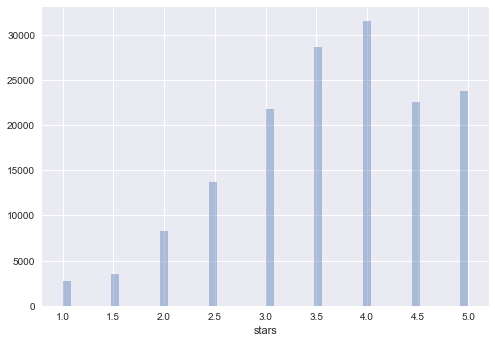

In [4]:
sns.distplot(business['stars'], kde=False)


In [21]:
import_file = 'review.json'
review = pd.read_json(import_file, lines=True)

In [23]:
top1revBusi = review.loc[review['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw']
top1revBusi

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1366372,4JNXUYY8wbaaDmk3BPzlWw,0,2011-02-22,0,WE9eUYf5EV8AxJjl8QZRtA,5,"Very chic. Although, the menu items doesnt SCR...",0,K6FpHYwcJYznoXXu8ySZHw
1366373,4JNXUYY8wbaaDmk3BPzlWw,0,2015-04-15,0,7Fl41hKa0wjO3TlvHKD3lw,4,Cute french bistro with great service. I came ...,1,3SGQKsO1J-jcRIp3WNxCeA
1366374,4JNXUYY8wbaaDmk3BPzlWw,0,2013-11-11,0,Jm4iOfsltS3T59puoV6r8Q,5,"The food is very good, the prices fair and the...",0,LPT8XlpXlHGAp0Ri4Hu4Rw
1366375,4JNXUYY8wbaaDmk3BPzlWw,3,2015-12-28,2,m6lwvXPCdpKHVp05Bjkhlw,5,One of my favorite go-to brunch spots on the L...,8,3NnPbhmv_vEfPTBp2pnn9Q
1366376,4JNXUYY8wbaaDmk3BPzlWw,0,2015-09-16,0,nkb40j7kBe2qAci1xpyd3g,5,Simply amazing steak and frites. Got the blue ...,0,xl4rsQqpibUNhR8Jqxp4OQ
1366377,4JNXUYY8wbaaDmk3BPzlWw,0,2014-01-21,0,b9Lm7Nkv62P2k_ItKS-K3g,3,I always walk by here and eating on the outsid...,3,NpFvjy3AHPDNfqwtmYFzmQ
1366378,4JNXUYY8wbaaDmk3BPzlWw,0,2017-05-20,0,c5_VcmUqTMznLqm3_eFR9A,5,The scallops were amazing. So was the filet mi...,0,wqjdDk-Y1uDKWJEiaJDHKw
1366379,4JNXUYY8wbaaDmk3BPzlWw,0,2011-07-22,0,0C7r3y2sjTnJcYkuvVqgow,4,"Oui oui, I am a fan. Lunch reservations at Mon...",0,JIFrKtsoi-h6riFhCvsuIA
1366380,4JNXUYY8wbaaDmk3BPzlWw,1,2015-12-03,0,uOh51KKYKx0ylbBKTO3cVw,3,I came here for a super late lunch and wasn't ...,2,smfTtGpJbFGgwo-LHVQ2kA
1366381,4JNXUYY8wbaaDmk3BPzlWw,0,2011-02-16,0,iwXqrv3_9y14ofoA4JUPFg,5,This had to be one of the highlights of our tr...,0,s1GjqF7IKsm0LMobPhTR_A


In [59]:
top1_busi_review = top1revBusi['text']
top1_busi_review[:2]
type(top1_busi_review)
top1_busi_review_list = top1_busi_review.tolist()[:2]
top1_busi_review[:1]
top1_busi_review_list

[u'Very chic. Although, the menu items doesnt SCREAM French cuisine. Most foods looks like you can get at any American place.\n\nThe food is awesome though. One of the few places I actually come out satisfied. I ordered the Smoked salmon platter. I enjoyed it. I enjoy simple foods. My plate had shreds of salmon, a pile of capers (I LOVE CAPERS) and a gallop of cream cheese. You also had a choice of an everything or plain bagel. I put everything together and it was simply delish.\n\nService is super proper, like they were brainwashed. Not at all casual. Not that it hurts the business but it looks like they need to relax. \n\nPricing is alright. My uncle and I sat outside during high noon and the sun was just right on top of us. I didnt mind, I had sunglasses but I DO absolutely love the view of the Bellagio and caught one of their water fountain shows.',
 u"Cute french bistro with great service. I came on a Sunday morning without reservations. I appreciate how they have separate lines f

In [64]:
# top1_busi_review.to_csv('sample_user_review.csv', index = False)
# top1_busi_review = pd.read_csv('sample_user_review.csv')

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vectorizer1 = CountVectorizer(max_df = 0.3)
vectorizer2 = CountVectorizer(max_df = 0.3)

In [40]:
doc1 = vectorizer1.fit_transform(top1revBusi['text'])


In [41]:
freqs1 = [(word, doc1.getcol(idx).sum()) for word, idx in vectorizer1.vocabulary_.items()]
#sort from largest to smallest
print (sorted (freqs1, key = lambda x: -x[1])[:20])

[(u'as', 3525), (u'be', 2956), (u'french', 2949), (u'are', 2723), (u'if', 2659), (u'which', 2631), (u'just', 2523), (u'patio', 2448), (u'all', 2438), (u'there', 2413), (u'time', 2388), (u'ordered', 2364), (u'restaurant', 2343), (u'like', 2299), (u'out', 2255), (u'one', 2237), (u'really', 2150), (u'would', 2127), (u'get', 2061), (u'delicious', 2051)]


In [42]:
# tf-idf
tfidf = TfidfVectorizer() # without removing stop words

In [52]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [53]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [61]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(top1_busi_review_list)
tfidf

Extracting tf-idf features for NMF...


<2x134 sparse matrix of type '<type 'numpy.float64'>'
	with 134 stored elements in Compressed Sparse Row format>

In [62]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(top1_busi_review_list)
tf

Extracting tf features for LDA...


<2x134 sparse matrix of type '<type 'numpy.int64'>'
	with 134 stored elements in Compressed Sparse Row format>

In [58]:
# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)



Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


IndexError: index 2 is out of bounds for axis 1 with size 2

In [60]:
# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


TypeError: __init__() got an unexpected keyword argument 'beta_loss'

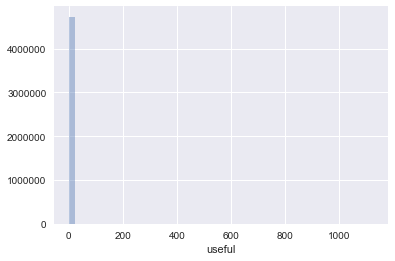

In [13]:
sns.distplot(review['useful'], kde=False)

In [ ]:
import_file = 'user.json'
user = pd.read_json(import_file, lines=True)

In [14]:
review['text'][:5]
textset = review['text'][:10]
type(textset)

pandas.core.series.Series

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [27]:
raw = review['text'][:5].str.lower()
tokens = tokenizer.tokenize(raw)


TypeError: expected string or buffer